# Exploratory Data Analysis Project

This project aims to perform an Exploratory Analysis of data from a used car dataset provided by Kaggle.

The link to the dataset is at: https: //www.kaggle.com/orgesleka/used-cars-database

The set of fingerprints was taken from the kaggle and contains details of the used cars in Germany that are for sale on ebay

Analysis to be performed:
        
        Vehicle Distribution based on Registration Year
        Variation of price range by vehicle type
        Total count of vehicles for sale by type
        Number of vehicles belonging to each brand
        Average vehicle price based on vehicle type as well as type of gearbox
        Average vehicle price by fuel type and gearbox type
        Average vehicle power per vehicle type and gearbox type
        Average price per brand and per vehicle
        Average price of a vehicle by brand, as well as vehicle type


In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import colorsys
plt.style.use('seaborn-talk')
from datetime import datetime
sns.set(style = "white")
#%matplotlib inline

In [2]:
# Importing the dataset
clean_data_path = "autos.csv"
df = pd.read_csv(clean_data_path, encoding = 'latin-1')

In [3]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313682,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Offer,0,control,Other,2005,manuell,0,...,2694,2016-03-21 10:42:49,2016,2016,March,March,0,10,11,5
313683,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Offer,2200,test,Other,2005,Unspecified,0,...,39576,2016-04-06 00:46:52,2016,2016,March,March,23,0,11,11
313684,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Offer,1199,test,cabrio,2000,automatik,101,...,26135,2016-03-11 18:17:12,2016,2016,March,March,6,18,16,9
313685,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Offer,9200,test,bus,1996,manuell,102,...,87439,2016-04-07 07:15:26,2016,2016,March,March,19,7,20,9


# Data Cleaning and Transformation

In [4]:
# Checking for missing values
df.isnull().sum()

dateCrawled              0
name                     0
seller                   0
offerType                0
price                    0
abtest                   0
vehicleType              0
yearOfRegistration       0
gearbox                  0
powerPS                  0
model                    0
kilometer                0
monthOfRegistration      0
fuelType               189
brand                    0
notRepairedDamage        0
dateCreated              0
postalCode               0
lastSeen                 0
yearOfCreation           0
yearCrawled              0
monthOfCreation          0
monthCrawled             0
NoOfDaysOnline           0
NoOfHrsOnline            0
yearsOld                 0
monthsOld                0
dtype: int64

In [5]:
# drop missing values
df['fuelType'].fillna(df['fuelType'].mode()[0], inplace = True)

In [6]:
df.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
yearOfCreation         0
yearCrawled            0
monthOfCreation        0
monthCrawled           0
NoOfDaysOnline         0
NoOfHrsOnline          0
yearsOld               0
monthsOld              0
dtype: int64

In [20]:
# Checking and changing the type of each column..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          313687 non-null  datetime64[ns]
 1   name                 313687 non-null  object        
 2   seller               313687 non-null  object        
 3   offerType            313687 non-null  object        
 4   price                313687 non-null  int64         
 5   abtest               313687 non-null  object        
 6   vehicleType          313687 non-null  object        
 7   yearOfRegistration   313687 non-null  object        
 8   gearbox              313687 non-null  object        
 9   powerPS              313687 non-null  int64         
 10  model                313687 non-null  object        
 11  kilometer            313687 non-null  int64         
 12  monthOfRegistration  313687 non-null  object        
 13  fuelType      

In [21]:
# Converting Numeric values to object
df["yearOfRegistration"] = df["yearOfRegistration"].astype(object)
df["yearOfCreation"] = df["yearOfCreation"].astype(object)
df["yearCrawled"] = df["yearCrawled"].astype(object)
df["postalCode"] = df["postalCode"].astype(object)

# Converting Data values to datatime
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])

df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          313687 non-null  datetime64[ns]
 1   name                 313687 non-null  object        
 2   seller               313687 non-null  object        
 3   offerType            313687 non-null  object        
 4   price                313687 non-null  int64         
 5   abtest               313687 non-null  object        
 6   vehicleType          313687 non-null  object        
 7   yearOfRegistration   313687 non-null  object        
 8   gearbox              313687 non-null  object        
 9   powerPS              313687 non-null  int64         
 10  model                313687 non-null  object        
 11  kilometer            313687 non-null  int64         
 12  monthOfRegistration  313687 non-null  object        
 13  fuelType      

## Vehicle Distribution based on Registration Year

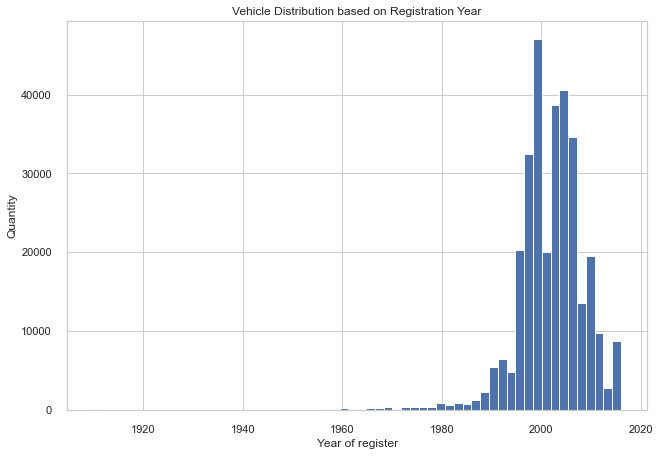

In [27]:
df.yearOfRegistration.hist(bins = 60)
plt.title("Vehicle Distribution based on Registration Year")
plt.xlabel("Year of register")
plt.ylabel("Quantity")
plt.show()

In [28]:
df["yearOfRegistration"].describe()

count     313687
unique        93
top         2000
freq       24313
Name: yearOfRegistration, dtype: int64

## Variation of the price range by vehicle type

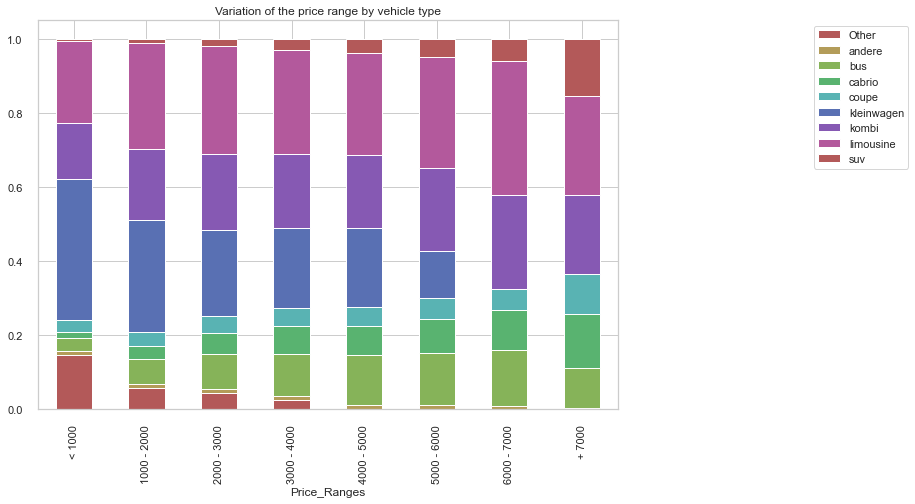

In [29]:
# price x vehicleType

# Grouping the data
df_priceranges = df.copy()
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, df.price.max()]

df_priceranges["Price_Ranges"] = pd.cut(df_priceranges["price"],
                                bins,
                                labels = ["< 1000", "1000 - 2000", "2000 - 3000", "3000 - 4000","4000 - 5000",
                                         "5000 - 6000", "6000 - 7000", " + 7000"])

df2 = pd.crosstab(df_priceranges.Price_Ranges, df_priceranges.vehicleType).apply(lambda r: r/r.sum(), axis = 1)

# Setting the quantity
num = len(df_priceranges.Price_Ranges.value_counts().index)

# list of colors
listaHSV = [(x*1.0/num, 0.5, 0.7) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Stacked Bar Graph
ax1 = df2.plot(kind = "bar", stacked = True, color = listaRGB, title = "Variation of the price range by vehicle type")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))


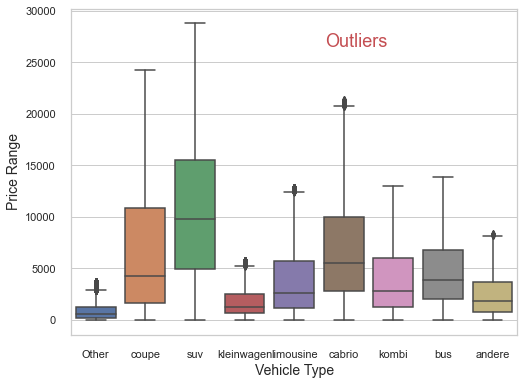

In [31]:
# Create a Boxplot to evaluate outliers
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.text(5.25,27000,"Outliers",fontsize=18,color="r",ha="center", va="center")
ax.xaxis.set_label_text("Vehicle Type",fontdict= {'size':14})
ax.yaxis.set_label_text("Price Range",fontdict= {'size':14})
plt.show()

## Total count of vehicles for sale according to type

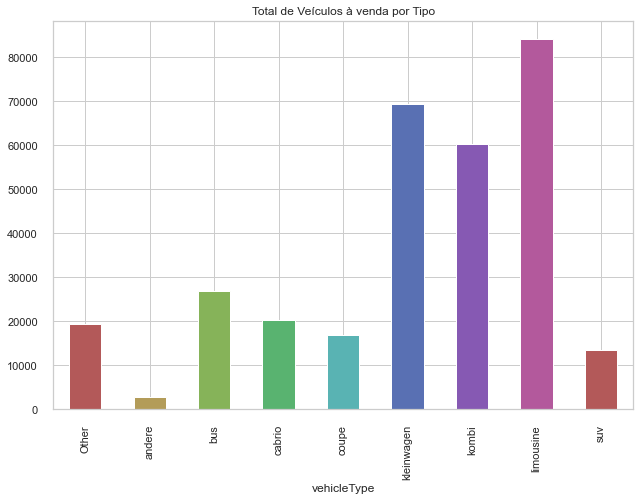

In [32]:
total_veiculos = df.groupby(["vehicleType"]).count()["name"].rename("Tipos")
total_veiculos.plot(kind = 'bar',color = listaRGB, title = "Total de Veículos à venda por Tipo")

## Number of vehicles belonging to each brand

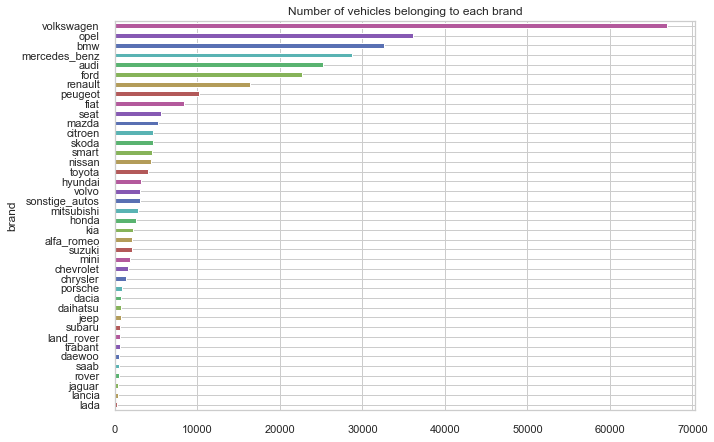

In [34]:
veiculos_marcas = df.groupby(["brand"]).count()["name"].rename("Marcas").sort_values()
veiculos_marcas.plot(kind = 'barh', color = listaRGB, title = "Number of vehicles belonging to each brand")

## Average price of vehicles based on vehicle type, as well as type of gearbox

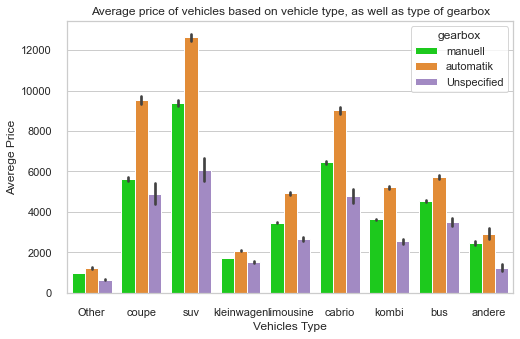

In [35]:
fig, ax = plt.subplots(figsize=(8,5))
color = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="vehicleType", y ="price", hue="gearbox", palette=color, data=df)
ax.set_title("Average price of vehicles based on vehicle type, as well as type of gearbox")
ax.xaxis.set_label_text("Vehicles Type")
ax.yaxis.set_label_text("Average Price")
plt.show()

## Average vehicle price by fuel type and gearbox type

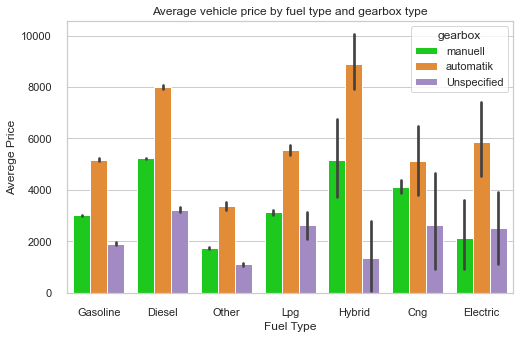

In [36]:
fig, ax = plt.subplots(figsize=(8,5))
color = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="fuelType", y ="price", hue="gearbox", palette=color, data=df)
ax.set_title("Average vehicle price by fuel type and gearbox type")
ax.xaxis.set_label_text("Fuel Type")
ax.yaxis.set_label_text("Average Price")
plt.show()

## Average vehicle power by vehicle type and gearbox type

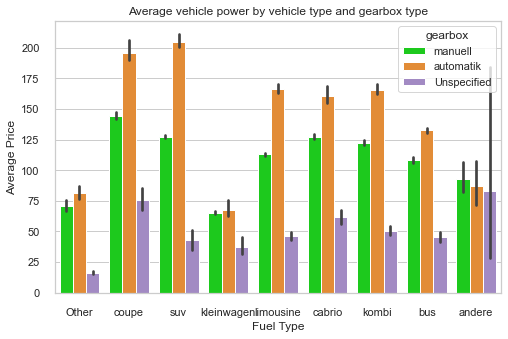

In [38]:
fig, ax = plt.subplots(figsize=(8,5))
color = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="vehicleType", y ="powerPS", hue="gearbox", palette=color, data=df)
ax.set_title("Average vehicle power by vehicle type and gearbox type")
ax.xaxis.set_label_text("Fuel Type")
ax.yaxis.set_label_text("Average Price")
plt.show()

## Average price per brand and per vehicle

In [18]:
# Calcule a média de preço por marca e por veículo
trial = pd.DataFrame()
for b in list(df['brand'].unique()):
    for v in list(df['vehicleType'].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b, 'vehicleType':v, 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial['index']
trial["avgPrice"].fillna(0, inplace=True)
trial['avgPrice'].isnull().value_counts()
trial['avgPrice'] = trial['avgPrice'].astype(int)
trial.head()

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


## Average price of a vehicle by brand, as well as type of vehicle

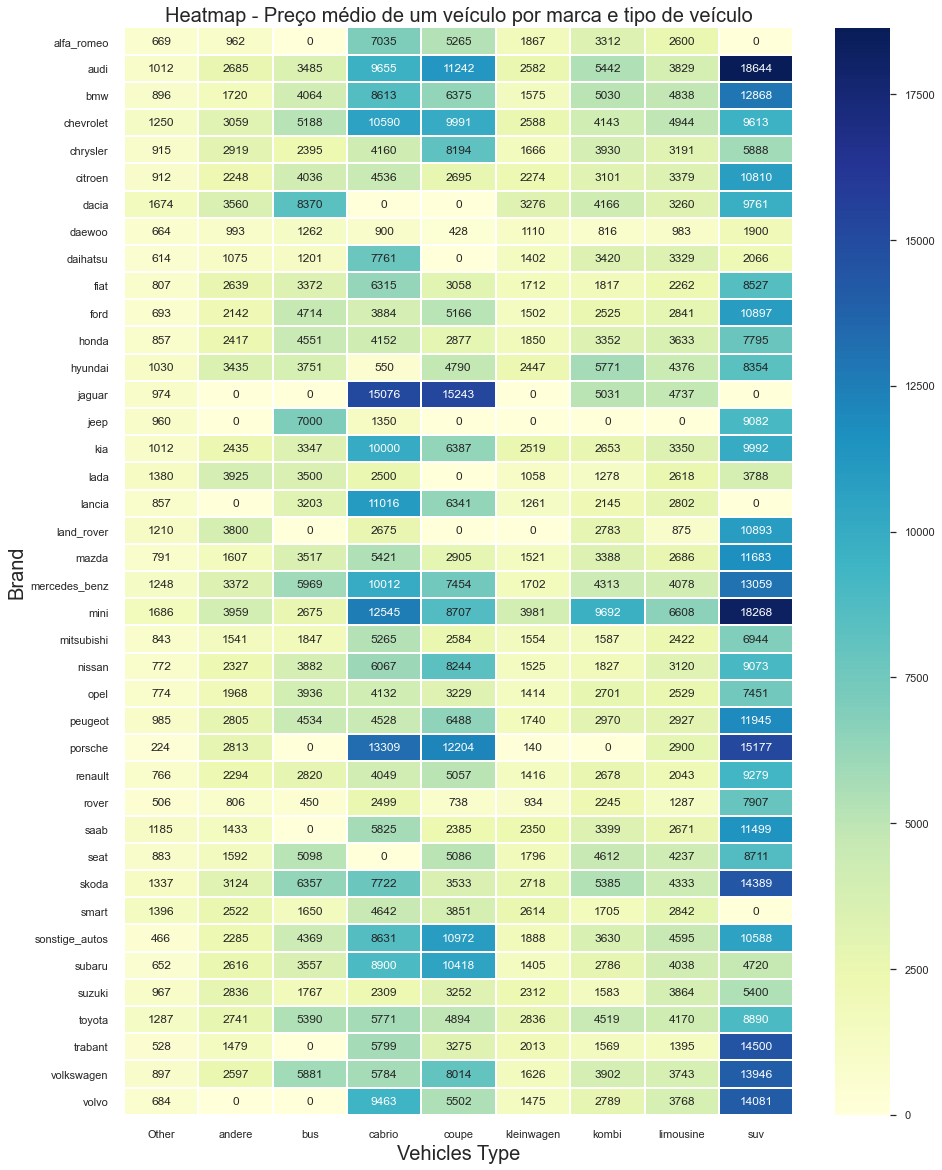

In [39]:
# Creating a Heatmap with Average Price of a vehicle by brand, as well as vehicle type
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Preço médio de um veículo por marca e tipo de veículo",fontdict={'size':20})
ax.xaxis.set_label_text("Vehicles Type",fontdict= {'size':20})
ax.yaxis.set_label_text("Brand",fontdict= {'size':20})
plt.show()